### 체육복

In [ ]:
def solution(n,lost,reserve):
    answer = 0
    cloth = [1] * n
    
    for idx in lost:
        cloth[idx-1] -= 1
    
    for idx in reserve:
        cloth[idx-1] += 1
        
    for idx,value in enumerate(cloth):
        if idx > 0 and value == 0 and cloth[idx-1] == 2:
            cloth[idx] = 1
            cloth[idx-1] = 1
        elif idx <n-1 and value == 0 and cloth[idx+1] == 2:
            cloth[idx] = 1
            cloth[idx+1] = 1
    print(cloth)
    return n-cloth.count(0)

In [5]:
a = [1,2,3,4]
a = enumerate(a)
for data in a:
    print(data)

(0, 1)
(1, 2)
(2, 3)
(3, 4)


### 큰 수 만들기
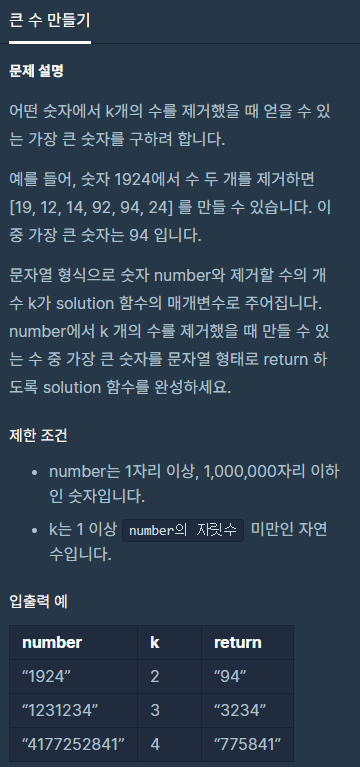

In [31]:
def solution(number, k):
    answer = ''
    data = list(map(int,list(number)))
    for i in range(k):
        data.pop(data.index(min(data)))
    for i in data:
        answer+=str(i)
    return answer

In [32]:
solution("4177252841",4)

[4, 7, 7, 5, 8, 4]


'477584'

In [19]:
a = "1234"
a = list(map(int,list(a)))
a

[1, 2, 3, 4]

### 베스트앨범
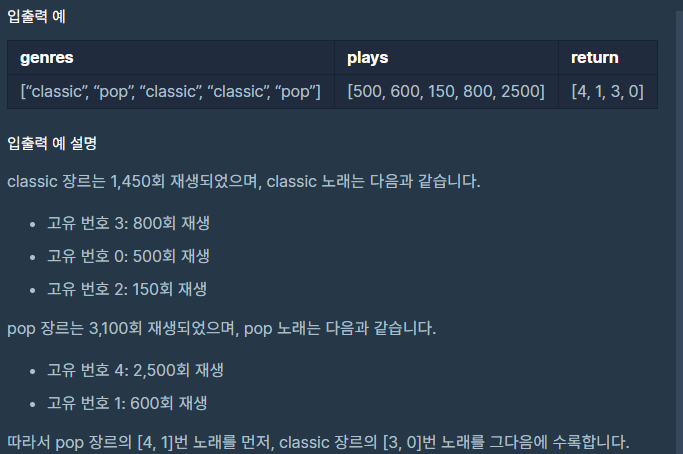
<ol>
    <li>속한 노래가 많이 재생된 장르를 먼저 수록함</li>
    <li>장르 내에서 많이 재생된 노래를 먼저 수록함</li>
    <li>장르 내에서 재생횟수가 같은 노래중에선 고유번호가 낮은 노래를 먼저 수록함</li>
</ol>
   
    

In [15]:
def solution(genres, plays):
    data = zip(genres,plays)
    data = enumerate(data)
    filter1,filter2,answer = dict(),dict(),[]
    for d in data:
        if d[1][0] not in filter1.keys():
            filter1[d[1][0]] = d[1][1]
            filter2[d[1][0]] = [(d[0],d[1][1])]
        else:
            filter1[d[1][0]] += d[1][1]
            filter2[d[1][0]].append((d[0],d[1][1]))
    filter1 = sorted(filter1.items(), reverse=True, key=lambda data:data[1])
    for i in filter1:
        count = 0
        temp = filter2[i[0]]
        temp = sorted(temp, reverse=True, key=lambda data:(data[1],-data[0]))
        for index in temp:
            if count != 2:
                answer.append(index[0])
                count+=1
    return answer

In [16]:
genres=["classic", "pop", "classic", "pop", "classic","classic"]
plays=[400, 600, 150, 2500, 500, 500]
solution(genres,plays)


[3, 1, 4, 5]

In [17]:
a = [(5, 500), (4, 500), (0, 400), (2, 150)]
sorted(a, reverse = True,key=lambda data:(data[1],-data[0]))

[(4, 500), (5, 500), (0, 400), (2, 150)]